In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge,Lasso,RidgeCV,ElasticNet,ElasticNetCV,LassoCV,LinearRegression
import seaborn as sns


C:\Users\ajitg\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ajitg\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ajitg\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Reading CSV file

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,ChannelBandwidth,Freq,RSSI,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
0,0,2447,-50,9.722222,3,3.082237,182686,270,66588,263,42.33
1,0,2412,-95,0.000000,0,556.061333,521148474,528509,58537457,257923,39.96
2,1,2472,-59,6.944444,0,8.599071,521148474,528509,58537555,257924,42.12
3,0,2437,-49,9.722222,0,2.758319,521148474,528509,58537845,257927,48.36
4,0,2412,-95,0.000000,0,556.061333,521370780,528877,58606944,258277,39.96


In [5]:
df.isnull().sum()

ChannelBandwidth       0
Freq                   0
RSSI                   0
channel_utilisation    0
count                  0
distance               0
rxbytes                0
rxpackets              0
txbytes                0
txpackets              0
Score                  0
dtype: int64

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
data_x = df[['ChannelBandwidth','Freq','RSSI','channel_utilisation','count','distance','rxbytes','rxpackets','txbytes','txpackets']]
data_y = df[['Score']]
scaled_df = scaling.fit_transform(data_x)

In [7]:
data_x

,ChannelBandwidth,Freq,RSSI,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets
0,0,2447,-50,9.722222,3,3.082237,182686,270,66588,263
1,0,2412,-95,0.000000,0,556.061333,521148474,528509,58537457,257923
2,1,2472,-59,6.944444,0,8.599071,521148474,528509,58537555,257924
3,0,2437,-49,9.722222,0,2.758319,521148474,528509,58537845,257927
4,0,2412,-95,0.000000,0,556.061333,521370780,528877,58606944,258277
...,...,...,...,...,...,...,...,...,...,...
2136,1,2412,-74,4.166667,0,49.559018,1222499571,1259074,162066207,631682
2137,2,5220,-80,27.777778,0,45.690877,1222499571,1259074,162066207,631682
2138,0,2422,-65,6.944444,0,17.511601,1222534510,1259155,162088516,631730
2139,2,5220,-68,55.555556,0,11.477029,1222534510,1259155,162088516,631730


In [8]:
data_y

,Score
0,42.33
1,39.96
2,42.12
3,48.36
4,39.96
...,...
2136,35.63
2137,21.26
2138,37.69
2139,8.76


In [9]:
scaled_df.shape

(2141, 10)

In [10]:
scaled_df

array([[-0.91332574, -0.72441202,  1.62463021, ..., -3.2837541 ,
        -3.31362394, -3.33526846],
       [-0.91332574, -0.74809562, -1.46929949, ..., -2.14933242,
        -2.34500727, -2.26259221],
       [ 0.20534154, -0.70749516,  1.00584427, ..., -2.14933242,
        -2.34500565, -2.26258805],
       ...,
       [-0.91332574, -0.74132888,  0.59332031, ..., -0.58023081,
        -0.62960124, -0.70637902],
       [ 1.32400882,  1.15200607,  0.38705833, ..., -0.58023081,
        -0.62960124, -0.70637902],
       [-0.91332574, -0.73117876,  1.55587622, ..., -3.2841557 ,
        -3.31401628, -3.33607611]])

In [11]:
scaled_df = pd.DataFrame(scaled_df,columns = ['ChannelBandwidth','Freq','RSSI','channel_utilisation','count','distance','rxbytes','rxpackets','txbytes','txpackets'])

In [12]:
scaled_df

,ChannelBandwidth,Freq,RSSI,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets
0,-0.913326,-0.724412,1.624630,-0.280165,5.532149,-0.738526,-3.223703,-3.283754,-3.313624,-3.335268
1,-0.913326,-0.748096,-1.469299,-0.642633,-0.117874,3.297212,-2.089490,-2.149332,-2.345007,-2.262592
2,0.205342,-0.707495,1.005844,-0.383727,-0.117874,-0.698264,-2.089490,-2.149332,-2.345006,-2.262588
3,-0.913326,-0.731179,1.693384,-0.280165,-0.117874,-0.740890,-2.089490,-2.149332,-2.345001,-2.262576
4,-0.913326,-0.748096,-1.469299,-0.642633,-0.117874,3.297212,-2.089006,-2.148542,-2.343856,-2.261118
...,...,...,...,...,...,...,...,...,...,...
2136,0.205342,-0.748096,-0.025466,-0.487290,-0.117874,-0.399331,-0.562555,-0.580405,-0.629971,-0.706579
2137,1.324009,1.152006,-0.437990,0.392990,-0.117874,-0.427561,-0.562555,-0.580405,-0.629971,-0.706579
2138,-0.913326,-0.741329,0.593320,-0.383727,-0.117874,-0.633218,-0.562479,-0.580231,-0.629601,-0.706379
2139,1.324009,1.152006,0.387058,1.428614,-0.117874,-0.677260,-0.562479,-0.580231,-0.629601,-0.706379


In [13]:
# df = scaled_df

In [14]:
df.describe()

,ChannelBandwidth,Freq,RSSI,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
count,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2.141000e+03,2.141000e+03,2.141000e+03,2.141000e+03,2141.000000
mean,0.816441,3517.547408,-73.629612,17.236883,0.062588,104.275544,1.480892e+09,1.529337e+06,2.000946e+08,8.014043e+05,31.619099
std,0.894130,1478.160883,14.548008,26.828539,0.531095,137.052570,4.594268e+08,4.657549e+05,6.037944e+07,2.402591e+05,14.126530
min,0.000000,2412.000000,-96.000000,0.000000,0.000000,0.138243,1.356100e+04,5.300000e+01,7.777000e+03,6.900000e+01,-54.050000
25%,0.000000,2422.000000,-87.000000,1.388889,0.000000,8.187857,1.557649e+09,1.582873e+06,1.979192e+08,8.102500e+05,29.650000
50%,0.000000,2452.000000,-74.000000,5.555556,0.000000,38.566653,1.684934e+09,1.737645e+06,2.266605e+08,9.088090e+05,35.630000
75%,2.000000,5220.000000,-61.000000,13.888889,0.000000,162.117350,1.732515e+09,1.788096e+06,2.324149e+08,9.296390e+05,39.840000
max,2.000000,5805.000000,-23.000000,166.666667,5.000000,621.335061,3.067641e+09,2.751557e+06,3.804404e+08,1.594921e+06,82.230000


In [15]:
# df

# Model training

In [16]:
#label
data_y = np.array(data_y)
# df= df.drop('Score', axis = 1)
#features
feature_list = list(df.columns)
data_x = np.array(scaled_df)

In [17]:
data_x.shape

(2141, 10)

In [18]:
# x = df[['RSSI','Freq','ChannelBandwidth','rxbytes','rxpackets','txbytes','txpackets','count','distance','Level']]
# x.columns

In [19]:
data_x

array([[-0.91332574, -0.72441202,  1.62463021, ..., -3.2837541 ,
        -3.31362394, -3.33526846],
       [-0.91332574, -0.74809562, -1.46929949, ..., -2.14933242,
        -2.34500727, -2.26259221],
       [ 0.20534154, -0.70749516,  1.00584427, ..., -2.14933242,
        -2.34500565, -2.26258805],
       ...,
       [-0.91332574, -0.74132888,  0.59332031, ..., -0.58023081,
        -0.62960124, -0.70637902],
       [ 1.32400882,  1.15200607,  0.38705833, ..., -0.58023081,
        -0.62960124, -0.70637902],
       [-0.91332574, -0.73117876,  1.55587622, ..., -3.2841557 ,
        -3.31401628, -3.33607611]])

In [20]:
data_y

array([[42.33],
       [39.96],
       [42.12],
       ...,
       [37.69],
       [ 8.76],
       [43.04]])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)


# LinearRegression

In [22]:

l_reg = linear_model.LinearRegression()

model = l_reg.fit(x_train,y_train)
predictions = model.predict(x_test)

print("R^2 value: ", l_reg.score(data_x,data_y))
print("coedd: ",l_reg.coef_)
print("intercept: ",l_reg.intercept_)

R^2 value:  0.9947654807014007
coedd:  [[  0.71272252   3.64660913  10.93190118 -19.01504486   0.21821618
    5.56744884   1.78784477  -2.29726655   1.12887569  -0.05522803]]
intercept:  [31.61571729]


In [23]:
# Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


y_pred = predictions
y_true = y_test
print('Accuracy: ',r2_score(y_true,y_pred))


Accuracy:  0.9948312377876765


In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

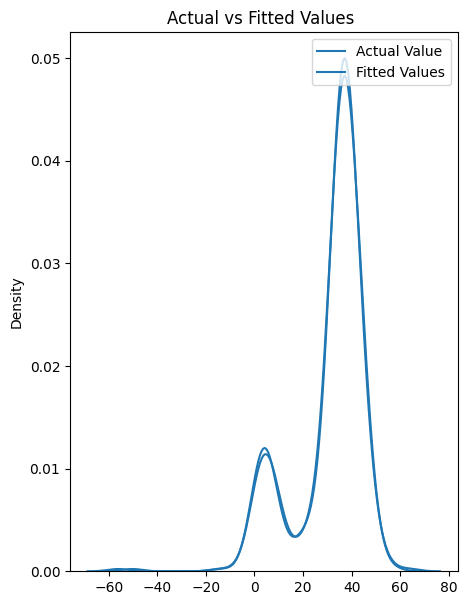

In [24]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.kdeplot(y_true, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values ')
# Add a legend
plt.legend(loc='upper right')


plt.show()
plt.close()

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)             

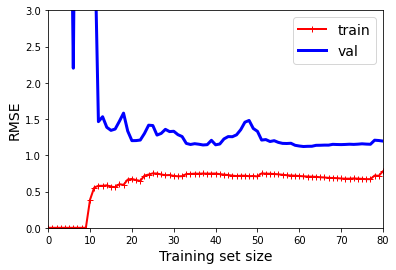

In [59]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x_train, y_train)
plt.axis([0, 80, 0, 3])                        
plt.show()                                     

There is a gap between the curves. This means that the model performs
significantly better on the training data than on the validation data,
which is the hallmark of an overfitting model. If you used a much larger
training set, however, the two curves would continue to get closer.

# Save the Model

In [60]:
import joblib
joblib.dump(l_reg, 'LinearRegressorScaled.pkl')
print("Model dumped!")

Model dumped!


In [49]:
xcheck = [[-76,2462,0,2238648972,1873636,155885400,783102,4.0,61.124026]]
xcheck

[[-76, 2462, 0, 2238648972, 1873636, 155885400, 783102, 4.0, 61.124026]]

In [51]:
dfcheck = pd.DataFrame(xcheck,columns =['RSSI','Freq','ChannelBandwidth','rxbytes','rxpackets','txbytes','txpackets','count','distance'])
dfcheck

,RSSI,Freq,ChannelBandwidth,rxbytes,rxpackets,txbytes,txpackets,count,distance
0,-76,2462,0,2238648972,1873636,155885400,783102,4.0,61.124026


In [52]:
scalex = scaling.transform(dfcheck)


In [53]:
testy = l_reg.predict(scalex)
testy

array([[11.54213751]])

# Lasso Reg 

In [61]:
# Create Lasso and Ridge regression models
lasso =Lasso(alpha=0.1)

# Fit the models on the training data
lasso.fit(x_train, y_train)

# Make predictions on the testing data
lasso_pred = lasso.predict(x_test)

# Evaluate the performance of the models using mean squared error
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("Lasso MSE: ", lasso_mse)



Lasso MSE:  1.0326896220886521


In [62]:
plt.figure(figsize=(5, 7))


ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(lasso_pred, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values ')
# Add a legend
plt.legend(loc='upper right')


plt.show()
plt.close()

ValueError: If using all scalar values, you must pass an index

<Figure size 360x504 with 0 Axes>

In [63]:
lasso.score(x_test,y_test)

0.9940228885959016

c:\Users\ajitg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


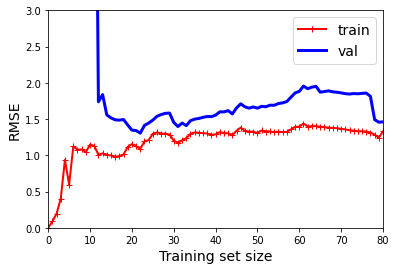

In [64]:
lasso_reg = Lasso(alpha=0.1, tol=1e-2)

plot_learning_curves(lasso_reg, x_train, y_train)
plt.axis([0, 80, 0, 3])                        
plt.show() 

# Save the Model


In [65]:
joblib.dump(l_reg, 'LinearRegressorLassoScaled.pkl')
print("Model dumped!")

Model dumped!


In [60]:
# Load the model that you just saved
LR = joblib.load('LinearRegressorLassoScaled.pkl')
testy = LR.predict([[-76,2462,0,2238648972,1873636,155885400,783102,4.0,61.124026]])
testy

array([[2.9710433e+10]])